<a href="https://colab.research.google.com/github/SiriBatchu/Data-preparation_EDA_Visualization/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
pd.options.display.float_format = '{:.2f}'.format

In [2]:
data = pd.read_csv('/content/avocado.csv')
data = data.drop('Unnamed: 0',axis = 1)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


In [3]:
data.shape

(18249, 13)

In [4]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


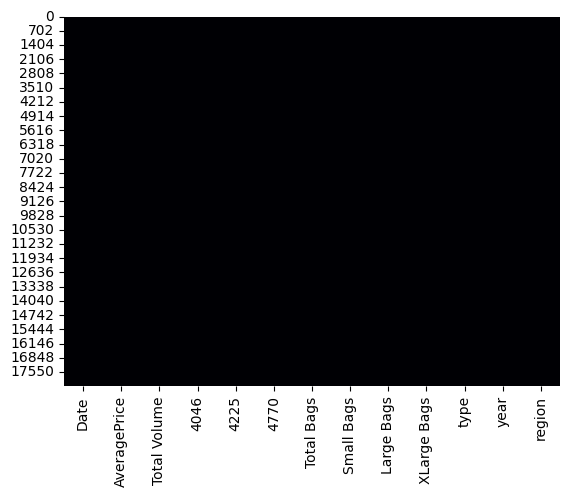

In [6]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.00,1.41,0.40,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.00,850644.01,3453545.36,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.00,293008.42,1264989.08,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.00,295154.57,1204120.40,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.00,22839.74,107464.07,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.00,239639.20,986242.40,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.00,182194.69,746178.51,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.00,54338.09,243965.96,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.00,3106.43,17692.89,0.00,0.00,0.00,132.50,551693.65
year,18249.00,2016.15,0.94,2015.00,2015.00,2016.00,2017.00,2018.00


In [8]:
df1 = data.copy(deep = True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
df1 = df1.resample('W').sum()
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,140.54,84674337.20,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-11,148.03,78555807.24,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-18,150.24,78388784.08,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-01-25,150.89,76466281.07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...
2015-02-01,134.68,119453235.25,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46,conventionalconventionalconventionalconvention...,217620,AlbanyAtlantaBaltimoreWashingtonBoiseBostonBuf...


# EDA

<ipython-input-9-4991e3ad2080>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AveragePrice']);
<ipython-input-9-4991e3ad2080>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['AveragePrice']);
<ipython-input-9-4991e3ad2080>:14: UserWarning: Ignoring `palette` because no `hue` variabl

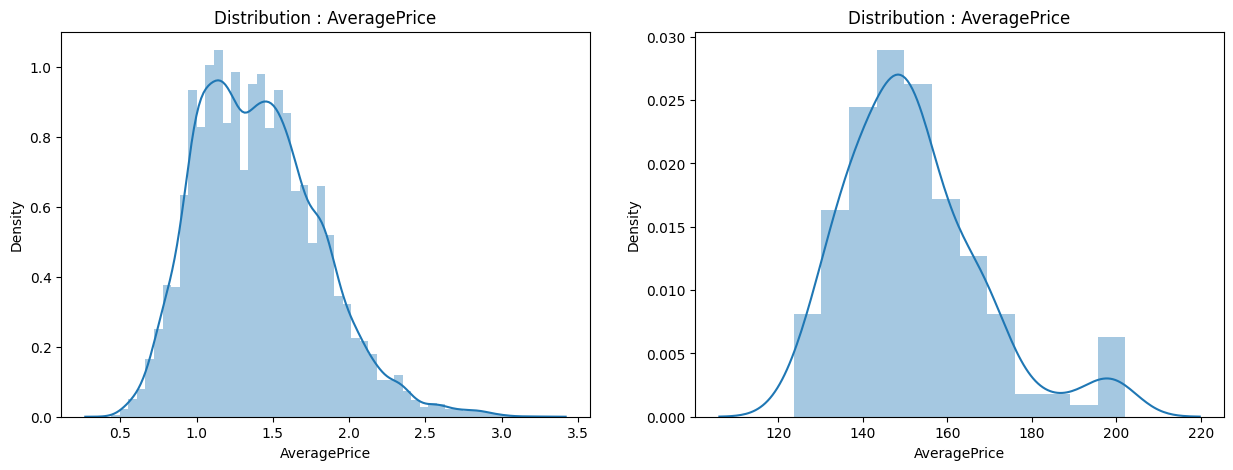

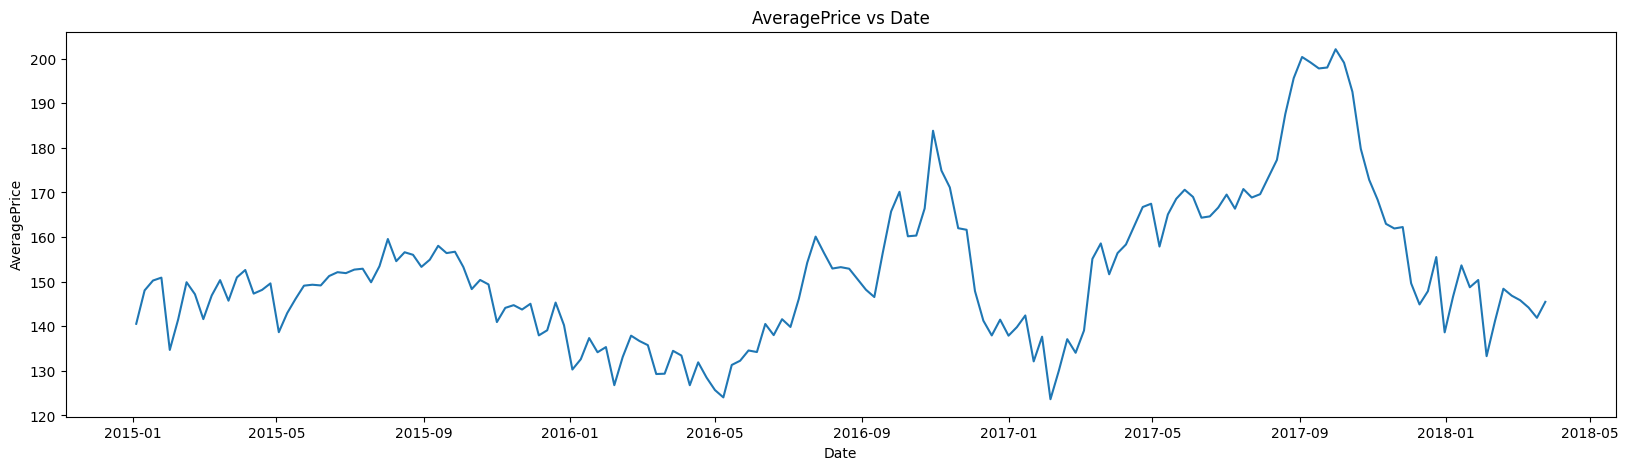

In [9]:
color1 = ['#296C92','#3EB489']
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(data['AveragePrice']);
plt.title('Distribution : AveragePrice')

plt.subplot(1,2,2)
sns.distplot(df1['AveragePrice']);
plt.title('Distribution : AveragePrice')

fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (20,5))
plt.subplot(1,1,1)
sns.lineplot(x = df1.index ,y = 'AveragePrice',data = df1,palette = color1);
plt.title('AveragePrice vs Date')

plt.show()
fig.tight_layout(pad = 2)

In [10]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

numerical_features.remove('Date')
numerical_features.remove('AveragePrice')
numerical_features.remove('region')
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : type year
Numerical Features : Total Volume 4046 4225 4770 Total Bags Small Bags Large Bags XLarge Bags


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['type'] = le.fit_transform(data['type'])

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
for i in range(len(categorical_features)):

    plt.subplot(1,2,i+1)
    sns.distplot(data[categorical_features[i]],kde_kws = {'bw' : 1});
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
for i in range(len(categorical_features)):

    plt.subplot(1,2,i+1)
    sns.countplot(data[categorical_features[i]],palette = color1);
    title = 'Count : ' + categorical_features[i]
    plt.title(title)

<ipython-input-13-d541d5ab684f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[categorical_features[i]],kde_kws = {'bw' : 1});
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-13-d541d5ab684f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
for i in range(len(categorical_features)):

    plt.subplot(1,2,i+1)
    sns.barplot(x = categorical_features[i],y = 'AveragePrice',data = data,palette = color1,edgecolor = 'black')
    title = categorical_features[i] + ' vs AveragePrice'
    plt.title(title);